In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Used to expand invisible columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

from sklearn.preprocessing import StandardScaler

# IMPORTING DATA

In [2]:
data_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0, low_memory=False)

# EXPLORING DATA

In [3]:
data_raw.shape

(466285, 74)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
data_raw.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
12832,791946,996321,6500,6500,6500.0,36 months,11.99,215.87,B,B5,ozarks family vision centre,3 years,RENT,16800.0,Not Verified,Jun-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/21/11 > I AM WANTING TO...,other,paying off credit cards,656xx,MO,12.36,1.0,Jul-97,0.0,17.0,NaN,4.0,0.0,6888,78.6,16.0,f,0.0,0.0,7768.612344,7768.61,6500.0,1268.61,0.0,0.0,0.0,Jun-14,430.27,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_raw.id.nunique()

466285

In [7]:
data_raw.member_id.nunique()

466285

In [8]:
cols_to_drop = ['id','member_id','url','desc','zip_code','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m','sub_grade']

In [9]:
data = data_raw.drop(cols_to_drop, axis=1)

In [10]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
3640,20000,20000,19875.0,60 months,22.35,556.37,F,NOVA,8 years,RENT,73000.0,Verified,Nov-11,Charged Off,n,debt_consolidation,Debt Consolidation,VA,14.10,0.0,Aug-95,0.0,78.0,89.0,4.0,1.0,9533,86.7,14.0,f,0.00,0.00,8224.90,8173.41,2666.40,4564.28,0.0,994.22,8.89,Jan-13,27.43,NaN,May-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
237584,4200,4200,4200.0,36 months,14.31,144.18,C,Clerk,7 years,RENT,55828.0,Not Verified,Dec-14,Current,n,vacation,Vacation,NY,10.73,4.0,Dec-00,0.0,5.0,NaN,5.0,0.0,2715,87.6,28.0,f,2885.30,2885.30,1867.66,1867.66,1314.70,552.96,0.0,0.00,0.00,Jan-16,144.18,Feb-16,Jan-16,0.0,47.0,1,INDIVIDUAL,0.0,0.0,13727.0,3100.0
279022,28500,28500,28500.0,60 months,22.15,789.58,E,NaN,NaN,MORTGAGE,75000.0,Verified,Oct-14,Current,n,debt_consolidation,Debt consolidation,IL,25.25,0.0,Sep-98,1.0,40.0,NaN,10.0,0.0,9051,82.3,27.0,w,24333.72,24333.72,11019.05,11019.05,4166.28,6852.77,0.0,0.00,0.00,Jan-16,789.58,Feb-16,Jan-16,1.0,51.0,1,INDIVIDUAL,0.0,0.0,156101.0,11000.0
218140,15000,15000,15000.0,36 months,20.99,565.05,E,"dr dale brent,inc",7 years,MORTGAGE,285000.0,Verified,May-12,Charged Off,n,debt_consolidation,Debt Consolidation Loan,CA,18.47,0.0,Jan-93,2.0,NaN,NaN,25.0,0.0,68672,65.9,47.0,f,0.00,0.00,4141.53,4141.53,1896.40,1492.22,0.0,752.91,7.45,Nov-12,565.05,NaN,Apr-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
267260,11950,11950,11950.0,60 months,23.43,339.84,F,Truck Driver,3 years,RENT,40000.0,Source Verified,Oct-14,Current,n,debt_consolidation,Debt consolidation,IL,14.61,0.0,Aug-01,1.0,36.0,NaN,6.0,0.0,7528,78.4,10.0,w,10253.91,10253.91,4742.21,4742.21,1696.09,3046.12,0.0,0.00,0.00,Jan-16,339.84,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,17396.0,9600.0


# DEFINING TARGET VARIABLE

In [11]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [12]:
bad_status = ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [13]:
data['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

In [14]:
data.drop('loan_status', axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

In [15]:
#Modify emp_length
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
#Modifying string so that only numbers are extracted and stored
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

C:\Users\Doni\AppData\Local\Temp\ipykernel_10752\3389655232.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')


In [17]:
#Storing 'emp_length_int' as float dtype
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [18]:
data.drop('emp_length', axis=1, inplace=True)

In [19]:
#Modifying term
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [21]:
data.drop('term', axis=1, inplace=True)

In [22]:
#Modify earliest_cr_line
data['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [23]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [24]:
data['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['months_since_earliest_cr_line'].head(5)

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: months_since_earliest_cr_line, dtype: float64

In [25]:
data['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [26]:
data[data['months_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']].head(5)

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


In [27]:
data.loc[data['months_since_earliest_cr_line']<0, 'months_since_earliest_cr_line'] = data['months_since_earliest_cr_line'].max()

In [28]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

In [29]:
#Modify issue_d
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['months_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [30]:
data['months_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_since_issue_d, dtype: float64

In [31]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [32]:
#Modifying last_pymnt_d
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['months_since_last_payment_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [33]:
data['months_since_last_payment_date'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: months_since_last_payment_date, dtype: float64

In [34]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [35]:
#Modifying next_pymnt_d
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [37]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [38]:
#Modifying last_credit_pull_d
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [39]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [40]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

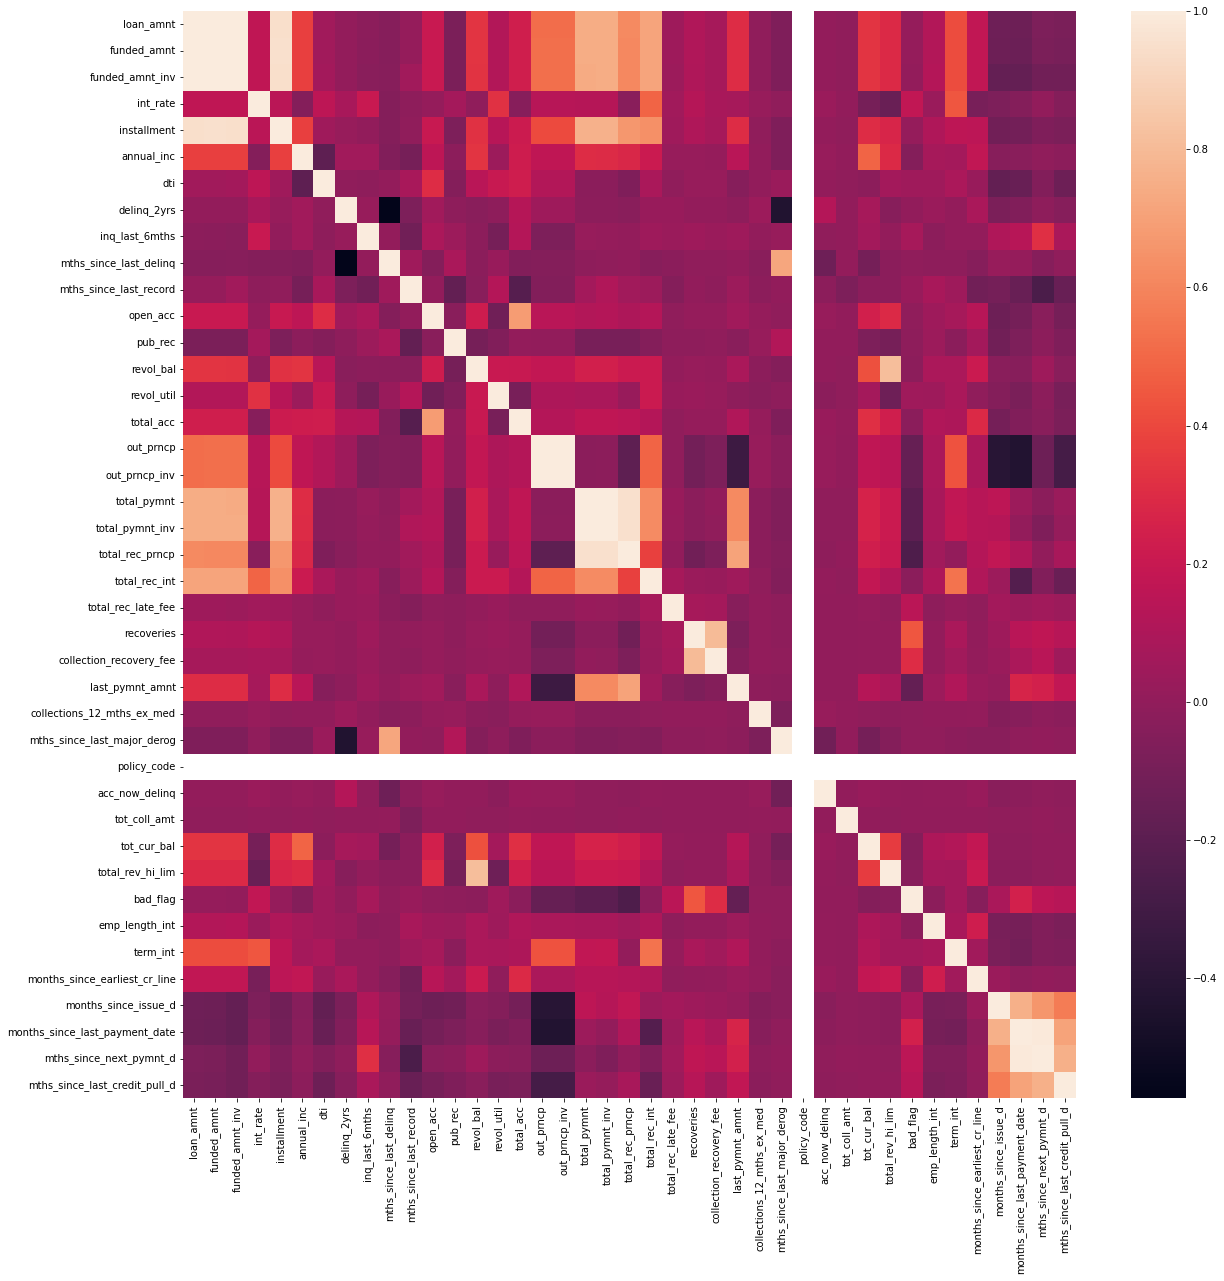

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

In [42]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\Doni\AppData\Local\Temp\ipykernel_10752\1624107534.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [43]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'months_since_last_payment_date',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [44]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

# Checking Categorical Features

In [45]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [46]:
#Drop features with one unique values OR high unique values
data.drop(['emp_title','title','application_type'], axis=1, inplace=True)

In [47]:
data.dtypes

loan_amnt                          int64
int_rate                         float64
grade                             object
home_ownership                    object
annual_inc                       float64
verification_status               object
pymnt_plan                        object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                      float64
inq_last_6mths                   float64
mths_since_last_delinq           float64
mths_since_last_record           float64
open_acc                         float64
pub_rec                          float64
revol_bal                          int64
revol_util                       float64
total_acc                        float64
initial_list_status               object
out_prncp                        float64
total_rec_late_fee               float64
recoveries                       float64
collections_12_mths_ex_med       float64
policy_code     

In [48]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                          1352
int_rate                            506
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
total_rec_late_fee                 5808
recoveries                        22773
collections_12_mths_ex_med            9
policy_code                           1
acc_now_delinq                        6
tot_coll_amt                       6321
tot_cur_bal                      220690
bad_flag                              2
emp_length_int                       11
term_int                              2
months_since_earliest_cr_line       515


In [49]:
data.drop(['policy_code'], axis=1, inplace=True)

In [50]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

In [51]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

In [52]:
#Check for missing values
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record           86.566585
mths_since_last_delinq           53.690554
tot_coll_amt                     15.071469
tot_cur_bal                      15.071469
emp_length_int                    4.505399
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
delinq_2yrs                       0.006219
inq_last_6mths                    0.006219
open_acc                          0.006219
pub_rec                           0.006219
total_acc                         0.006219
acc_now_delinq                    0.006219
months_since_earliest_cr_line     0.006219
annual_inc                        0.000858
dtype: float64

In [53]:
#Exclude columns that have missing values abve 75%
data.drop('mths_since_last_record', axis=1, inplace=True)

In [55]:
#Fill in missing values
data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].mean(), inplace=True)
data['tot_coll_amt'].fillna(data['tot_coll_amt'].mean(), inplace=True)
data['tot_cur_bal'].fillna(data['tot_cur_bal'].mean(), inplace=True)
data['emp_length_int'].fillna(data['emp_length_int'].mean(), inplace=True)
data['revol_util'].fillna(data['revol_util'].mean(), inplace=True)
data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].mean(), inplace=True)
data['delinq_2yrs'].fillna(data['delinq_2yrs'].mean(), inplace=True)
data['inq_last_6mths'].fillna(data['inq_last_6mths'].mean(), inplace=True)
data['open_acc'].fillna(data['open_acc'].mean(), inplace=True)
data['pub_rec'].fillna(data['pub_rec'].mean(), inplace=True)
data['total_acc'].fillna(data['total_acc'].mean(), inplace=True)
data['acc_now_delinq'].fillna(data['acc_now_delinq'].mean(), inplace=True)
data['months_since_earliest_cr_line'].fillna(data['months_since_earliest_cr_line'].mean(), inplace=True)
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)

# FEATURE SCALING AND TRANSFORMATION

In [56]:
#OneHotEncoding transformation of categorical column
categorical_cols = [
    col for col in data.select_dtypes(include='object').columns.tolist()
]

In [57]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [58]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Standardization

In [59]:
numerical_cols = [
    col for col in data.columns.tolist()
    if col not in categorical_cols + ['bad_flag']
]

In [60]:
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [61]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,months_since_earliest_cr_line,months_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357035,0.178877,-4.794339e-16,-1.641562,-0.31431,-0.124888,1.160138,-1.384892,-0.693944,-0.123464,-0.154549,-0.083634,-0.05831,0.0,0.0,1.130425,-0.616225,1.765198,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357035,3.843347,-4.794339e-16,-1.641562,-0.31431,-0.703378,-1.971718,-1.815936,-0.693944,-0.123464,0.057470,-0.083634,-0.05831,0.0,0.0,-1.690933,1.622784,-0.212652,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357035,1.094994,-4.794339e-16,-1.842068,-0.31431,-0.642003,1.783980,-1.298684,-0.693944,-0.123464,-0.154549,-0.083634,-0.05831,0.0,0.0,1.130425,-0.616225,-0.571210,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357035,0.178877,6.042797e-02,-0.238015,-0.31431,-0.514224,-1.482761,1.028949,-0.693944,3.099264,-0.154549,-0.083634,-0.05831,0.0,0.0,1.130425,-0.616225,0.226870,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357035,-0.737241,2.628509e-01,0.764518,-0.31431,0.558748,-0.095977,1.115158,-0.573268,-0.123464,-0.154549,-0.083634,-0.05831,0.0,0.0,-1.408797,1.622784,0.238436,1.446626


In [62]:
#Analyzing transformed dataframe
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)
data_model

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,months_since_earliest_cr_line,months_since_issue_d,bad_flag
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.124392,-0.729587,-0.896551,1.328632,-0.357035,0.178877,-4.794339e-16,-1.641562,-0.314310,-0.124888,1.160138,-1.384892,-0.693944,-0.123464,-0.154549,-0.083634,-0.05831,0.000000,0.000000,1.130425,-0.616225,1.765198,1.446626,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.426088,0.330634,-0.787387,-2.065791,-0.357035,3.843347,-4.794339e-16,-1.641562,-0.314310,-0.703378,-1.971718,-1.815936,-0.693944,-0.123464,0.057470,-0.083634,-0.05831,0.000000,0.000000,-1.690933,1.622784,-0.212652,1.446626,1
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.438156,0.488979,-1.110294,-1.082491,-0.357035,1.094994,-4.794339e-16,-1.842068,-0.314310,-0.642003,1.783980,-1.298684,-0.693944,-0.123464,-0.154549,-0.083634,-0.05831,0.000000,0.000000,1.130425,-0.616225,-0.571210,1.446626,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.521001,-0.077850,-0.438063,0.354248,-0.357035,0.178877,6.042797e-02,-0.238015,-0.314310,-0.514224,-1.482761,1.028949,-0.693944,3.099264,-0.154549,-0.083634,-0.05831,0.000000,0.000000,1.130425,-0.616225,0.226870,1.446626,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.365749,-0.261438,0.122311,0.091865,-0.357035,-0.737241,2.628509e-01,0.764518,-0.314310,0.558748,-0.095977,1.115158,-0.573268,-0.123464,-0.154549,-0.083634,-0.05831,0.000000,0.000000,-1.408797,1.622784,0.238436,1.446626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.492696,0.147046,0.668130,0.33

# MODELING

In [63]:
#Train-test split modeling
from sklearn.model_selection import train_test_split

In [64]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

In [66]:
#Train the model
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [68]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,4.301829e-01
88,out_prncp,2.258022e-01
89,total_rec_late_fee,1.178782e-01
77,int_rate,4.799226e-02
98,months_since_issue_d,2.942802e-02
3,grade_E,2.508780e-02
78,annual_inc,2.109542e-02
96,term_int,1.785158e-02
4,grade_F,1.634035e-02
2,grade_D,1.037746e-02


In [69]:
#Validating model after regression
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]


df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

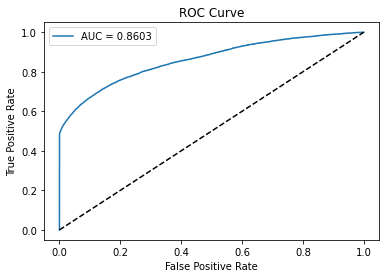

In [70]:
#AUC prediction
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [71]:
#KS prediction
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,321938,0,0.048749,1,0,1,0.000011,0.0,0.000012
1,243214,0,0.048997,2,0,2,0.000021,0.0,0.000024
2,369212,0,0.049215,3,0,3,0.000032,0.0,0.000036
3,313116,0,0.049382,4,0,4,0.000043,0.0,0.000048
4,440154,0,0.049386,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5711')

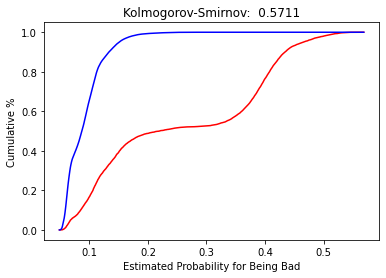

In [72]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In conclusion, the performance of AUC = 0.8603 and KS = 0.5711.